# Reading the small project data into Python

This file will show how to read the data from the files `train.h5` and `test.h5` into Python, for training.
The files are available at:

<https://www.nbi.dk/~petersen/Teaching/ML2020/SmallProject/train.h5>

<https://www.nbi.dk/~petersen/Teaching/ML2020/SmallProject/test.h5>

We start by opening the files and loading them into a Numpy array

In [156]:
import h5py
import pandas
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingClassifier
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
import shap

In [2]:
def load_data(name):
    with h5py.File(f'{name}.h5', 'r') as f:
        return pandas.DataFrame(f[name][:])

train = load_data('train')
test  = load_data('test')

Then we can verify the shape

In [3]:
print (f'Shape of training data set: {train.shape}')
print (f'Shape of test data set: {test.shape}')

Shape of training data set: (162500, 166)
Shape of test data set: (160651, 164)


As expected, the test set contains 2 columns less: `Truth` and `p_truth_E`.
    
Then we copy the variable list from the course website <https://www.nbi.dk/~petersen/Teaching/ML2020/SmallProject/VariableList.html>

In [4]:
all_variables = ['actualInteractionsPerCrossing', 'averageInteractionsPerCrossing', 'correctedActualMu', 'correctedAverageMu', 'correctedScaledActualMu', 'correctedScaledAverageMu', 'NvtxReco', 'p_nTracks', 'p_pt_track', 'p_eta', 'p_phi', 'p_charge', 'p_qOverP', 'p_z0', 'p_d0', 'p_sigmad0', 'p_d0Sig', 'p_EptRatio', 'p_dPOverP', 'p_z0theta', 'p_etaCluster', 'p_phiCluster', 'p_eCluster', 'p_rawEtaCluster', 'p_rawPhiCluster', 'p_rawECluster', 'p_eClusterLr0', 'p_eClusterLr1', 'p_eClusterLr2', 'p_eClusterLr3', 'p_etaClusterLr1', 'p_etaClusterLr2', 'p_phiClusterLr2', 'p_eAccCluster', 'p_f0Cluster', 'p_etaCalo', 'p_phiCalo', 'p_eTileGap3Cluster', 'p_cellIndexCluster', 'p_phiModCalo', 'p_etaModCalo', 'p_dPhiTH3', 'p_R12', 'p_fTG3', 'p_weta2', 'p_Reta', 'p_Rphi', 'p_Eratio', 'p_f1', 'p_f3', 'p_Rhad', 'p_Rhad1', 'p_deltaEta1', 'p_deltaPhiRescaled2', 'p_TRTPID', 'p_TRTTrackOccupancy', 'p_numberOfInnermostPixelHits', 'p_numberOfPixelHits', 'p_numberOfSCTHits', 'p_numberOfTRTHits', 'p_numberOfTRTXenonHits', 'p_chi2', 'p_ndof', 'p_SharedMuonTrack', 'p_E7x7_Lr2', 'p_E7x7_Lr3', 'p_E_Lr0_HiG', 'p_E_Lr0_LowG', 'p_E_Lr0_MedG', 'p_E_Lr1_HiG', 'p_E_Lr1_LowG', 'p_E_Lr1_MedG', 'p_E_Lr2_HiG', 'p_E_Lr2_LowG', 'p_E_Lr2_MedG', 'p_E_Lr3_HiG', 'p_E_Lr3_LowG', 'p_E_Lr3_MedG', 'p_ambiguityType', 'p_asy1', 'p_author', 'p_barys1', 'p_core57cellsEnergyCorrection', 'p_deltaEta0', 'p_deltaEta2', 'p_deltaEta3', 'p_deltaPhi0', 'p_deltaPhi1', 'p_deltaPhi2', 'p_deltaPhi3', 'p_deltaPhiFromLastMeasurement', 'p_deltaPhiRescaled0', 'p_deltaPhiRescaled1', 'p_deltaPhiRescaled3', 'p_e1152', 'p_e132', 'p_e235', 'p_e255', 'p_e2ts1', 'p_ecore', 'p_emins1', 'p_etconeCorrBitset', 'p_ethad', 'p_ethad1', 'p_f1core', 'p_f3core', 'p_maxEcell_energy', 'p_maxEcell_gain', 'p_maxEcell_time', 'p_maxEcell_x', 'p_maxEcell_y', 'p_maxEcell_z', 'p_nCells_Lr0_HiG', 'p_nCells_Lr0_LowG', 'p_nCells_Lr0_MedG', 'p_nCells_Lr1_HiG', 'p_nCells_Lr1_LowG', 'p_nCells_Lr1_MedG', 'p_nCells_Lr2_HiG', 'p_nCells_Lr2_LowG', 'p_nCells_Lr2_MedG', 'p_nCells_Lr3_HiG', 'p_nCells_Lr3_LowG', 'p_nCells_Lr3_MedG', 'p_pos', 'p_pos7', 'p_poscs1', 'p_poscs2', 'p_ptconeCorrBitset', 'p_ptconecoreTrackPtrCorrection', 'p_r33over37allcalo', 'p_topoetconeCorrBitset', 'p_topoetconecoreConeEnergyCorrection', 'p_topoetconecoreConeSCEnergyCorrection', 'p_weta1', 'p_widths1', 'p_widths2', 'p_wtots1', 'p_e233', 'p_e237', 'p_e277', 'p_e2tsts1', 'p_ehad1', 'p_emaxs1', 'p_fracs1', 'p_DeltaE', 'p_E3x5_Lr0', 'p_E3x5_Lr1', 'p_E3x5_Lr2', 'p_E3x5_Lr3', 'p_E5x7_Lr0', 'p_E5x7_Lr1', 'p_E5x7_Lr2', 'p_E5x7_Lr3', 'p_E7x11_Lr0', 'p_E7x11_Lr1', 'p_E7x11_Lr2', 'p_E7x11_Lr3', 'p_E7x7_Lr0', 'p_E7x7_Lr1' ]

Finally, we divide the training data into data (`X`) and labels (`y`)

In [42]:
X = train[all_variables]
X_test = test[all_variables]
y = train['Truth']

print (f'Shape of X: {X.shape}')
print (f'Shape of X_test: {X_test.shape}')


print (f'Shape of y: {y.shape}')

Shape of X: (162500, 160)
Shape of X_test: (160651, 160)
Shape of y: (162500,)


In [6]:
X.head(1)

,actualInteractionsPerCrossing,averageInteractionsPerCrossing,correctedActualMu,correctedAverageMu,correctedScaledActualMu,correctedScaledAverageMu,NvtxReco,p_nTracks,p_pt_track,p_eta,...,p_E5x7_Lr0,p_E5x7_Lr1,p_E5x7_Lr2,p_E5x7_Lr3,p_E7x11_Lr0,p_E7x11_Lr1,p_E7x11_Lr2,p_E7x11_Lr3,p_E7x7_Lr0,p_E7x7_Lr1
0,26.5,26.5,26.5,26.5,26.5,26.5,18,3,42011.792969,1.834715,...,215.588013,43402.332031,74045.820312,337.980713,273.708801,43091.683594,74447.539062,470.177124,273.708801,43091.683594


In [7]:
target_count = y.value_counts()

Proportion: 2.96 : 1


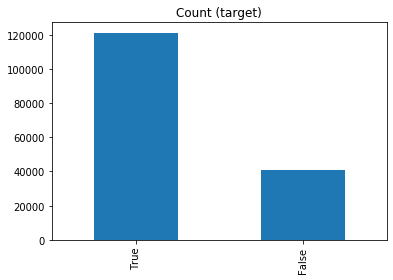

In [8]:
print('Proportion:', round(target_count[1] / target_count[0], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

## Preprocessing

### Check null values

In [9]:
train.isnull().sum()

eventNumber                       0
runNumber                         0
actualInteractionsPerCrossing     0
averageInteractionsPerCrossing    0
correctedActualMu                 0
                                 ..
p_E7x11_Lr2                       0
p_E7x11_Lr3                       0
p_E7x7_Lr0                        0
p_E7x7_Lr1                        0
index                             0
Length: 166, dtype: int64

No nulls
### Scale the data

In [44]:
transformed_X = deepcopy(X) 
transformed_X_test = deepcopy(X_test)
# This loop transforms every variable _independently_ 
for variable in X.columns: 
    scaler = RobustScaler().fit(np.array(transformed_X[variable]).reshape(-1,1))
    transformed_X[variable] = scaler.transform(np.array(transformed_X[variable]).reshape(-1,1))
    transformed_X_test[variable] = scaler.transform(np.array(transformed_X_test[variable]).reshape(-1,1))

### Select k Best features

In [11]:
from sklearn.feature_selection import SelectKBest, f_regression, f_classif

In [152]:
# Create and fit selector
selector = SelectKBest(score_func=f_classif, k=25)
X_25 = selector.fit_transform(transformed_X, y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
features_df_new = train.iloc[:,cols]
features_df_new.columns

Features [ 67  73  76 101 113 119 122 128 131 136] are constant.
invalid value encountered in true_divide


Index(['correctedScaledAverageMu', 'p_eClusterLr0', 'p_dPhiTH3', 'p_R12',
       'p_fTG3', 'p_weta2', 'p_Rphi', 'p_Eratio', 'p_f1', 'p_ndof',
       'p_E_Lr1_LowG', 'p_E_Lr3_HiG', 'p_deltaPhiRescaled3', 'p_e132',
       'p_e255', 'p_e2ts1', 'p_emins1', 'p_pos7', 'p_widths2', 'p_wtots1',
       'p_e237', 'p_e277', 'p_fracs1', 'p_E3x5_Lr2', 'p_E5x7_Lr2'],
      dtype='object')

## Bayesian optimisation of hyperparameters and cross validation

In [13]:
# def GBC_CrossValidation(n_estimators, learning_rate, max_depth, data, targets):
#     """Decision Tree cross validation.
#        Fits a Decision Tree with the given paramaters to the target 
#        given data, calculated a CV accuracy score and returns the mean.
#        The goal is to find combinations
#        that maximize the accuracy
#     """
    
#     estimator = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, 
#                                  max_depth=max_depth, random_state=0)
    
#     cval = cross_val_score(estimator, data, targets, scoring='accuracy', cv=5)
    
#     return cval.mean()

In [14]:
# def optimize_GBC(data, targets, pars, n_iter=5):
#     """Apply Bayesian Optimization to Decision Tree parameters."""
    
#     def crossval_wrapper(n_estimators, learning_rate, max_depth):
#         """Wrapper of Decision Tree cross validation. 
#            max_depth and n_estimators
#            are cast to integer before we pass them along.
#         """
#         return GBC_CrossValidation(n_estimators=int(n_estimators), 
#                                             learning_rate=learning_rate, 
#                                             max_depth=int(max_depth),
#                                             data=data, 
#                                             targets=targets)

#     optimizer = BayesianOptimization(f=crossval_wrapper, 
#                                      pbounds=pars, 
#                                      random_state=42, 
#                                      verbose=100)
#     optimizer.maximize(init_points=4, n_iter=n_iter)

#     return optimizer

In [15]:
# parameters_BayesianOptimization = {"learning_rate": (0.0001, 1), 
#                                    "max_depth": (1, 5),
#                                    "n_estimators": (50,500)
#                                   }

# BayesianOptimization = optimize_GBC(X_25, 
#                                              y, 
#                                              parameters_BayesianOptimization, 
#                                              n_iter=5)
# print(BayesianOptimization.max)

Cross-validation on result:

In [16]:
# gbc = GradientBoostingClassifier(n_estimators=int(BayesianOptimization.max['params']['n_estimators']), 
#                                  learning_rate=BayesianOptimization.max['params']['learning_rate'], 
#                                  max_depth=BayesianOptimization.max['params']['max_depth'], 
#                                  random_state=0)
# scores = cross_val_score(gbc, X_25, y, cv=5, scoring='f1') 
# print(f"{scores.mean():.4f} accuracy with a standard deviation of {scores.std():.4f}")

## LightGBM

In [35]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

data_train = lgb.Dataset(X_25, label=y)
params = {'objective': 'binary',
          'boosting_type': 'gbdt',
          'metric': 'binary_logloss',
          'learning_rate': 0.01,
          'num_leaves': 10,
          'max_depth': 10,
          'min_data': 10,
          'verbose': 0,
          'force_col_wise': True}

#lgb_clf = lgb.train(params, train_set=data_train, num_boost_round=300)
#lgb.cv(params, data_train, num_boost_round=300, nfold=5)


# y_pred = np.around(lgb_clf.predict(test_X))
# acc = accuracy_score(y_pred, test_y)
# print(f"Train accuracy: {acc*100.0:.2f}%")

# evaluate the model

model = LGBMClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
# fit the model on the whole dataset
model.fit(X, y)


Accuracy: 0.945 (0.002)


LGBMClassifier()

In [36]:
import optuna
from optuna.samplers import TPESampler
from optuna.integration import LightGBMPruningCallback
from optuna.pruners import MedianPruner
import lightgbm as lgb

#%%

lgb_data_train = lgb.Dataset(X_25, label=y)


#%%


def objective(trial):

    boosting_types = ["gbdt", "rf", "dart"]
    boosting_type = trial.suggest_categorical("boosting_type", boosting_types)

    params = {
        "objective": "binary",
        "boosting": boosting_type,
        "max_depth": trial.suggest_int("max_depth", 2, 63),
        "min_child_weight": trial.suggest_loguniform("min_child_weight", 1e-5, 10),
        "scale_pos_weight": trial.suggest_uniform("scale_pos_weight", 10.0, 30.0),
    }

    N_iterations_max = 10_000
    early_stopping_rounds = 50

    if boosting_type == "dart":
        N_iterations_max = 100
        early_stopping_rounds = None

    cv_res = lgb.cv(
        params,
        lgb_data_train,
        num_boost_round=N_iterations_max,
        early_stopping_rounds=early_stopping_rounds,
        verbose_eval=False,
        seed=42,
        callbacks=[LightGBMPruningCallback(trial, "auc")],
    )

    num_boost_round = len(cv_res["auc-mean"])
    trial.set_user_attr("num_boost_round", num_boost_round)
    return cv_res["auc-mean"][-1]


#%%

study = optuna.create_study(
    direction="maximize",
    sampler=TPESampler(seed=42),
    pruner=MedianPruner(n_warmup_steps=50),
)



[I 2021-05-22 18:47:47,100] A new study created in memory with name: no-name-4657967a-ea39-4222-9bcc-232a22b4cd09


In [37]:
study.optimize(objective, n_trials=100, show_progress_bar=True)

/Users/niallgray/opt/miniconda3/envs/aml/lib/python3.8/site-packages/optuna/progress_bar.py:47: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/100 [00:00<?, ?it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).





                                                                           


feature_fraction, val_score: 0.200055:  14%|#4        | 1/7 [78:35:32<00:50,  8.44s/it]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 97196, number of negative: 32804
[W 2021-05-22 18:49:02,999] Trial 0 failed because of the following error: LightGBMError('Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /tmp/pip-req-build-12fs9jsp/compile/src/boosting/rf.hpp, line 35 .\n')
Traceback (most recent call last):
  File "/Users/niallgray/opt/miniconda3/envs/aml/lib/python3.8/site-packages/optuna/_optimize.py", line 217, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-36-205b099d44e5>", line 35, in objective
    cv_res = lgb.cv(
  File "/Users/niallgray/opt/miniconda3/envs/aml/lib/python3.8/site-packages/lightgbm/engine.py", line 557, in cv
    c

LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /tmp/pip-req-build-12fs9jsp/compile/src/boosting/rf.hpp, line 35 .


In [38]:
from sklearn.model_selection import KFold

import optuna.integration.lightgbm as lgb


dtrain = lgb.Dataset(X_25, label=y)

params = {
    "objective": "binary",
    "metric": "binary_logloss",
    "verbosity": -1,
    "boosting_type": "gbdt",
}

tuner = lgb.LightGBMTunerCV(
    params, dtrain, verbose_eval=0, early_stopping_rounds=100, folds=KFold(n_splits=3), show_progress_bar=True
)

tuner.run()

print("Best score:", tuner.best_score)
best_params = tuner.best_params
print("Best params:", best_params)
print("  Params: ")
for key, value in best_params.items():
    print("    {}: {}".format(key, value))

[I 2021-05-22 18:49:19,275] A new study created in memory with name: no-name-799168dd-8c77-478b-8cf5-5acc0a19dbe5
min_data_in_leaf, val_score: 0.199386: 100%|##########| 5/5 [00:40<00:00,  8.07s/it]

Best score: 0.19938617897042646
Best params: {'objective': 'binary', 'metric': 'binary_logloss', 'verbosity': -1, 'boosting_type': 'gbdt', 'feature_pre_filter': False, 'lambda_l1': 0.0021162855817617346, 'lambda_l2': 9.484825815823141, 'num_leaves': 31, 'feature_fraction': 0.5, 'bagging_fraction': 0.840081722766568, 'bagging_freq': 3, 'min_child_samples': 50}
  Params: 
    objective: binary
    metric: binary_logloss
    verbosity: -1
    boosting_type: gbdt
    feature_pre_filter: False
    lambda_l1: 0.0021162855817617346
    lambda_l2: 9.484825815823141
    num_leaves: 31
    feature_fraction: 0.5
    bagging_fraction: 0.840081722766568
    bagging_freq: 3
    min_child_samples: 50


In [ ]:
data_train = lgb.Dataset(X_25, label=y)
params = best_params


# evaluate the model

model = LGBMClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
# fit the model on the whole dataset
model.fit(X, y)

Accuracy: 0.945 (0.002)


## Use SHAP values on un-optimised lightGBM model

Run lightGBM on the entire data set

In [17]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

data_train = lgb.Dataset(X, label=y)
params = {'objective': 'binary',
          'boosting_type': 'gbdt',
          'metric': 'binary_logloss',
          'learning_rate': 0.01,
          'num_leaves': 10,
          'max_depth': 10,
          'min_data': 10,
          'verbose': 1,
          'force_col_wise': True}


# evaluate the model

model = LGBMClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
# fit the model on the whole dataset
model.fit(X, y)


Accuracy: 0.945 (0.002)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


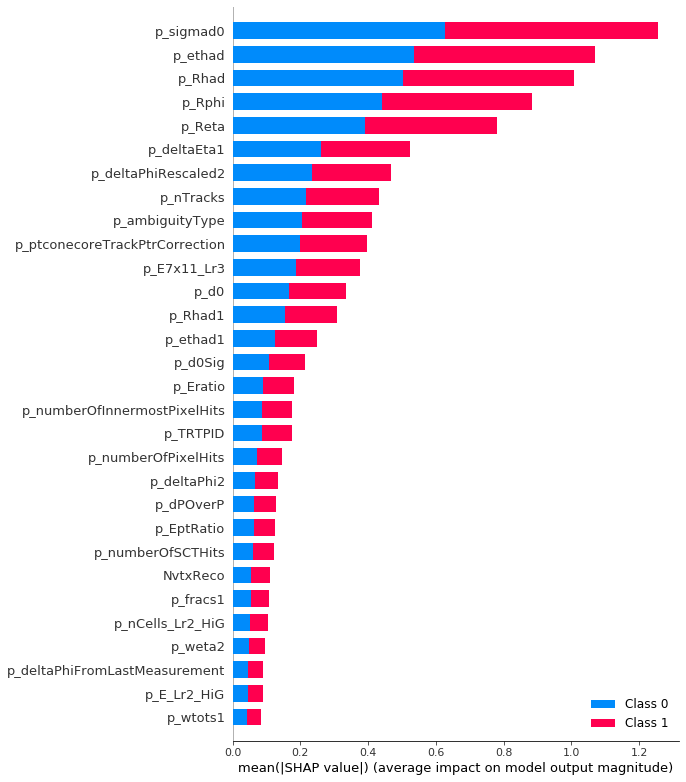

In [18]:
shap_valueslgb = shap.TreeExplainer(model).shap_values(X)
shap.summary_plot(shap_valueslgb, X, plot_type="bar", show=True, max_display=30)

In [19]:
feature_importance = pandas.DataFrame(list(zip(all_variables, shap_valueslgb[0].sum(0))), columns=['feature_name', 'feature_importance_vals'])
feature_importance = feature_importance.iloc[(-np.abs(feature_importance['feature_importance_vals'].values)).argsort()]

In [20]:
feature_importance

,feature_name,feature_importance_vals
15,p_sigmad0,-16034.749343
52,p_deltaEta1,15707.860278
50,p_Rhad,-14840.342740
14,p_d0,12023.072927
129,p_ptconecoreTrackPtrCorrection,10587.434495
...,...,...
107,p_maxEcell_gain,0.000000
136,p_widths2,0.000000
116,p_nCells_Lr1_LowG,0.000000
128,p_ptconeCorrBitset,0.000000


In [21]:
# names of top 25 features according to shap
top_25_features = feature_importance.head(25)

# get the data for these features
X_25_shap = X.iloc[:,top_25_features.index]
X_25_shap.shape

(162500, 25)

### Retry lightGBM classification with these 25 shap features

In [22]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

data_train = lgb.Dataset(X_25_shap, label=y)
params = {'objective': 'binary',
          'boosting_type': 'gbdt',
          'metric': 'binary_logloss',
          'learning_rate': 0.01,
          'num_leaves': 10,
          'max_depth': 10,
          'min_data': 10,
          'verbose': 1,
          'force_col_wise': True}


# evaluate the model

model = LGBMClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_25_shap, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
# fit the model on the whole dataset
#model.fit(X_25_shap, y)

Accuracy: 0.943 (0.002)


### Run optuna on the 25 shap features dataset

In [23]:
from sklearn.model_selection import KFold

import optuna.integration.lightgbm as lgb


dtrain = lgb.Dataset(X_25_shap, label=y)

params = {
    "objective": "binary",
    "metric": "binary_logloss",
    "verbosity": -1,
    "boosting_type": "gbdt",
}

tuner = lgb.LightGBMTunerCV(
    params, dtrain, verbose_eval=0, early_stopping_rounds=100, folds=KFold(n_splits=3), show_progress_bar=True
)

tuner.run()

print("Best score:", tuner.best_score)
best_params = tuner.best_params
print("Best params:", best_params)
print("  Params: ")
for key, value in best_params.items():
    print("    {}: {}".format(key, value))

[I 2021-05-23 19:46:03,313] A new study created in memory with name: no-name-7f4ce93d-4aac-40e3-a731-981d5708234e
min_data_in_leaf, val_score: 0.141919: 100%|##########| 5/5 [01:12<00:00, 14.46s/it]

Best score: 0.14191858476237512
Best params: {'objective': 'binary', 'metric': 'binary_logloss', 'verbosity': -1, 'boosting_type': 'gbdt', 'feature_pre_filter': False, 'lambda_l1': 1.619246801524985e-08, 'lambda_l2': 9.781097821392834, 'num_leaves': 31, 'feature_fraction': 0.748, 'bagging_fraction': 1.0, 'bagging_freq': 0, 'min_child_samples': 20}
  Params: 
    objective: binary
    metric: binary_logloss
    verbosity: -1
    boosting_type: gbdt
    feature_pre_filter: False
    lambda_l1: 1.619246801524985e-08
    lambda_l2: 9.781097821392834
    num_leaves: 31
    feature_fraction: 0.748
    bagging_fraction: 1.0
    bagging_freq: 0
    min_child_samples: 20


In [24]:
data_train = lgb.Dataset(X_25_shap, label=y)
params = best_params


# evaluate the model

model = LGBMClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_25_shap, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
# fit the model on the whole dataset
model.fit(X_25_shap, y)

Accuracy: 0.943 (0.002)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [122]:
## XGBoost classifier

In [148]:
from xgboost import XGBClassifier

In [153]:
def XGB_CrossValidation(n_estimators, learning_rate, max_depth, data, targets):
    """Decision Tree cross validation.
       Fits a Decision Tree with the given paramaters to the target 
       given data, calculated a CV accuracy score and returns the mean.
       The goal is to find combinations
       that maximize the accuracy
    """
    
    estimator = XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate, 
                                 max_depth=max_depth, random_state=0)
    
    cval = cross_val_score(estimator, data, targets, scoring='neg_log_loss', cv=5)
    
    return cval.mean()

In [154]:
def optimize_XGB(data, targets, pars, n_iter=5):
    """Apply Bayesian Optimization to Decision Tree parameters."""
    
    def crossval_wrapper(n_estimators, learning_rate, max_depth):
        """Wrapper of Decision Tree cross validation. 
           max_depth and n_estimators
           are cast to integer before we pass them along.
        """
        return XGB_CrossValidation(n_estimators=int(n_estimators), 
                                            learning_rate=learning_rate, 
                                            max_depth=int(max_depth),
                                            data=data, 
                                            targets=targets)

    optimizer = BayesianOptimization(f=crossval_wrapper, 
                                     pbounds=pars, 
                                     random_state=42, 
                                     verbose=2)
    optimizer.maximize(init_points=4, n_iter=n_iter)

    return optimizer

In [157]:
parameters_BayesianOptimization = {"learning_rate": (0.0001, 1), 
                                   "max_depth": (1, 5),
                                   "n_estimators": (50,500)
                                  }

BayesianOptimization = optimize_XGB(X_25_shap, 
                                             y, 
                                             parameters_BayesianOptimization, 
                                             n_iter=5)
print(BayesianOptimization.max)

|   iter    |  target   | learni... | max_depth | n_esti... |
-------------------------------------------------------------
|  1        | -0.1497   |  0.3746   |  4.803    |  379.4    |
|  2        | -0.1659   |  0.5987   |  1.624    |  120.2    |
|  3        | -0.1468   |  0.05818  |  4.465    |  320.5    |
|  4        | -0.1605   |  0.7081   |  1.082    |  486.5    |
|  5        | -0.1611   |  0.9906   |  1.013    |  299.7    |
|  6        | -0.189    |  0.05956  |  4.964    |  50.2     |
|  7        | -0.1647   |  0.0247   |  4.999    |  204.4    |


divide by zero encountered in log
invalid value encountered in multiply
divide by zero encountered in log
invalid value encountered in multiply
divide by zero encountered in log
invalid value encountered in multiply
divide by zero encountered in log
invalid value encountered in multiply


|  8        |  nan      |  0.9326   |  4.997    |  499.8    |


divide by zero encountered in log
invalid value encountered in multiply


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [158]:
xgb = XGBClassifier(n_estimators=int(BayesianOptimization.max['params']['n_estimators']), 
                                 learning_rate=BayesianOptimization.max['params']['learning_rate'], 
                                 max_depth=int(BayesianOptimization.max['params']['max_depth']), 
                                 random_state=0)
scores = cross_val_score(xgb, X_25_shap, y, cv=5, scoring='neg_log_loss') 
print(f"{scores.mean():.4f} accuracy with a standard deviation of {scores.std():.4f}")

TypeError: 'property' object is not subscriptable

In [ ]:
# fit the final model
xgb.fit(X_25_shap, y)

# Run algos on test data and make output files

## LightGBM

### Select only the 25 best features

In [47]:
transformed_X_test_25 = transformed_X_test.iloc[:,top_25_features.index]
transformed_X_test_25.shape

(160651, 25)

### Make continuous classification predictions on the test data using the trained lightGBM model (with shap chosen features and optuna hyp params)

In [79]:
lightGBM_test_predictions = model.predict_proba(transformed_X_test_25)[:,0]

### Save data predictions in output file

In [91]:
lightGBM_test_predictions.shape[0]

160651

(array([3.00000e+00, 3.00000e+00, 1.40000e+01, 4.80000e+01, 1.84000e+02,
        4.78000e+02, 9.91000e+02, 3.79400e+03, 2.26300e+04, 1.32506e+05]),
 array([0.05619657, 0.15051285, 0.24482912, 0.3391454 , 0.43346168,
        0.52777795, 0.62209423, 0.71641051, 0.81072678, 0.90504306,
        0.99935934]),
 <a list of 10 Patch objects>)

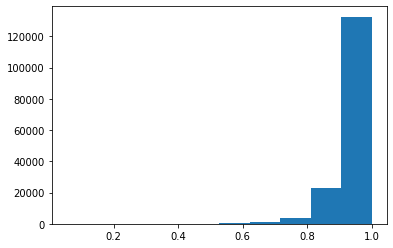

In [83]:
plt.hist(lightGBM_test_predictions)

In [106]:
out_df=pandas.DataFrame(lightGBM_test_predictions)

In [112]:
out_df.to_csv('solutions/Classification_NiallGray_LightGBMAlgo.txt',header=False)

In [105]:
lightGBM_test_predictions[0:10]

array([0.98698023, 0.86010173, 0.89974283, 0.78812873, 0.998884  ,
       0.96924959, 0.96613005, 0.95821074, 0.99438984, 0.91629155])

### Save the variables list

In [121]:
top_25_features.feature_name.to_csv('solutions/Classification_NiallGray_LightGBMAlgo_VariableList.txt',index=False, header=False)

## XGBoost

In [133]:
XGBoost_test_predictions = xgb.predict_proba(transformed_X_test_25)[:,0]

(array([2.2000e+01, 2.4000e+01, 4.2000e+01, 4.6000e+01, 6.9000e+01,
        8.9000e+01, 1.2000e+02, 2.2300e+02, 7.0600e+02, 1.5931e+05]),
 array([0.02530468, 0.12277421, 0.22024374, 0.31771326, 0.4151828 ,
        0.51265234, 0.61012185, 0.7075914 , 0.8050609 , 0.9025305 ,
        1.        ], dtype=float32),
 <a list of 10 Patch objects>)

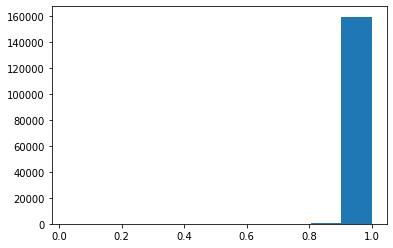

In [134]:
plt.hist(XGBoost_test_predictions)

In [135]:
out_df_xgb=pandas.DataFrame(XGBoost_test_predictions)

In [136]:
out_df_xgb.to_csv('solutions/Classification_NiallGray_xgboost.txt',header=False)

In [137]:
top_25_features.feature_name.to_csv('solutions/Classification_NiallGray_xgboost_VariableList.txt',index=False, header=False)